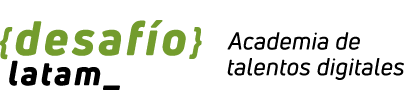

#<center><font color = 'green'>Modelos de ensamble Boosting</font></center>

## Carga de bibliotecas y datos

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
import numpy as np

# Cargar el conjunto de datos MNIST
mnist_data = fetch_openml(name="mnist_784", version=1,parser='auto')
X, y = np.array(mnist_data.data), np.array(mnist_data.target)

'''
Cada imagen en el conjunto de datos MNIST está etiquetada con el dígito que
representa (0 al 9). Cada píxel de la imagen está representado por un valor de
 intensidad en escala de grises. Por lo tanto, cada imagen es esencialmente
 una matriz de 28x28 valores, y cada valor representa la intensidad del píxel
 en esa posición.
'''

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
mnist_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Veremos a continuación la implementación de los diferentes modelos de ensamble secuencial. Utilizaremos una cantidad baja de estimadores, a fin de evitar un tiempo excesivo de ejecución.

## AdaBoost

In [12]:
# Definir el clasificador débil (puede ser cualquier clasificador base)
weak_classifier = DecisionTreeClassifier(max_depth=1)

# Definir el clasificador Adaboost
adaboost_classifier = AdaBoostClassifier(estimator_=weak_classifier, n_estimators=10, random_state=42, learning_rate=0.5)

# Entrenar el clasificador Adaboost
adaboost_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = adaboost_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Adaboost con MNIST: {accuracy}")

C:\Users\usuario\anaconda3\envs\Desafio_latam\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Precisión del modelo Adaboost con MNIST: 0.6252857142857143


## Gradient

In [3]:
# Definir el clasificador Gradient Boosting
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=42)

# Entrenar el clasificador Gradient Boosting
gradient_boosting_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = gradient_boosting_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Gradient Boosting con MNIST: {accuracy}")


Precisión del modelo Gradient Boosting con MNIST: 0.8413571428571428


## xGBoost

In [4]:
#Definir el clasificador xGBoosting
# Convertir las etiquetas a números enteros
y = y.astype(int)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el clasificador XGBoost
xgb_classifier = xgb.XGBClassifier(n_estimators=10, learning_rate=0.1, random_state=42)

# Entrenar el clasificador XGBoost
xgb_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = xgb_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo XGBoost con MNIST: {accuracy}")

Precisión del modelo XGBoost con MNIST: 0.919
